# Twitter Data Wrangle and Analyze Project

## Table of Contents
- [Project Details](#details)
- [Gathering Data](#gathering)
- [Assessing Data](#assessing)
- [Cleaning Data](#cleaning)
- [Data Analysis](#analysing)

<a id='details'></a>
## Project Details

In this project I will wrangle and analyze the tweet archive of Twitter user @dog_rates, also image prediction file and additional data via Twitter API.
    The goal is wrangle Twitter data to create interesting and trustworthy analyses and visualizations.

**Tasks of this are as follows:**

- Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on
    - 1) your data wrangling efforts and 
    - 2) your data analyses and visualizations

First we need to import tweepy package and libraries we need in this project.

In [1]:
# Instal tweepy for gathering data via Twitter API
conda install -c conda-forge tweepy

SyntaxError: invalid syntax (<ipython-input-1-d59c9392b829>, line 2)

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import re
import os
import json
import time
import warnings
import tweepy
from IPython.display import Image
import seaborn as sns; sns.set()
from tweepy import OAuthHandler
from timeit import default_timer as timer
from datetime import datetime as dt
%matplotlib inline

<a id='gathering'></a>
## Gathering Data

### WeRageDogs Twitter Archive

In [3]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

### Image predictions

In [4]:
#Downloading URL programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Reading TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

### Twitter API and JSON

In [5]:
#import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = '' 
 


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Rate limit reached. Sleeping for: 750


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
11

Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 745


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [8]:
# saving required info to the dataframe
tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                                       columns = ['tweet_id', 'retweet_count', 'favorite_count']))
tweet_json = tweet_json.reset_index(drop = True)
tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count
635,792050063153438720,1789,7150
1325,704134088924532736,444,1467
2032,671355857343524864,112,456
1355,701545186879471618,594,2601
1639,682808988178739200,162,1729
1907,674024893172875264,1147,1682
1913,673906403526995968,1540,3002
1494,690932576555528194,985,3201
966,748705597323898880,928,2731
241,844979544864018432,2457,13296


<a id='assessing'></a>
## Assessing Data

After gathering data, we are going to start with visual assessment and then use to programmatic assessment to identify data quality and tidiness issues.

### Visual assessment

In [9]:
# Display the Twitter archive table
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


`archive` (Twitter archive) columns:

- **tweet_id**: the unique identifier for each tweet
- **in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp**: time when this Tweet was created
- **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text**: actual UTF-8 text of the status update
- **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: tweet URL
- **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
- **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- **name**: name of the dog
- **doggo**: one of the 4 dog "stage"
- **floofer**: one of the 4 dog "stage"
- **pupper**: one of the 4 dog "stage"
- **puppo**: one of the 4 dog "stage"

In [10]:
# Display the tweet image predictions table
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


`image_prediction` (tweet image predictions) columns:

- **tweet_id**: the unique identifier for each tweet and it is the last part of the tweet URL after "status/"
- **jpg_url**: image URL
- **img_num**: image number
- **p1**: algorithm's 1 prediction for the image in the tweet
- **p1_conf**: how confident the algorithm is in its 1 prediction
- **p1_dog**: whether or not the 1 prediction is a breed of dog
- **p2**: algorithm's 2 prediction for the image in the tweet
- **p2_conf**: how confident the algorithm is in its 2 prediction
- **p2_dog**: whether or not the 2 prediction is a breed of dog
- **p3**: algorithm's 3 prediction for the image in the tweet
- **p3_conf**: how confident the algorithm is in its 3 prediction
- **p3_dog**: whether or not the 3 prediction is a breed of dog

In [11]:
# Display the weet status table
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7489,35468
1,892177421306343426,5557,30697
2,891815181378084864,3680,23088
3,891689557279858688,7658,38741
4,891327558926688256,8269,37012
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,125,265
2328,666033412701032449,39,109
2329,666029285002620928,41,119


`tweet_json` (tweet status) columns:

- **tweet_id**: the unique identifier for each tweet
- **retweet_count**: number of times this Tweet has been retweeted
- **favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users
- **display_text_range**: an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet


### Programmatic assessment

In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# Checking if dataframe have duplicated rows
archive.duplicated().sum()

0

In [15]:
# Checking null values of the dataframe
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
# Checking retweet's total
len(archive[archive.retweeted_status_id.isnull() == False])

181

In [17]:
# Review the dog names by sorthing by descending 
archive.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [18]:
# Checking if are both dog stages provided
len(archive[(archive.doggo != 'None') & (archive.floofer != 'None')])

1

In [19]:
# Checking if are both dog stages provided
len(archive[(archive.doggo != 'None') & (archive.pupper != 'None')])

12

In [20]:
# Checking if are both dog stages provided
len(archive[(archive.doggo != 'None') & (archive.puppo != 'None')])

1

In [21]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# Checking if dataframe have duplicated rows
image_prediction.duplicated().sum()

0

In [24]:
# Checking null values of the dataframe
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [25]:
# Review the values of prediction 1
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
marmot                  1
polecat                 1
handkerchief            1
ibex                    1
otter                   1
Name: p1, Length: 378, dtype: int64

In [26]:
# Review the values of prediction 2
image_prediction['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
wood_rabbit             1
spotlight               1
desk                    1
barbershop              1
mud_turtle              1
Name: p2, Length: 405, dtype: int64

In [27]:
# Review the values of prediction 3
image_prediction['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ballplayer             1
go-kart                1
swimming_trunks        1
neck_brace             1
parallel_bars          1
Name: p3, Length: 408, dtype: int64

In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: object(3)
memory usage: 54.8+ KB


In [29]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2331,2331,2331
unique,2331,1688,2001
top,826598799820865537,435,0
freq,1,7,163


In [30]:
# Checking if dataframe have duplicated rows
tweet_json.tweet_id.duplicated().sum()

0

In [31]:
# Checking null values of the dataframe
tweet_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [32]:
# Review the retweet_count by sorthing by ascending 
tweet_json.sort_values(['retweet_count'], ascending=False)

,tweet_id,retweet_count,favorite_count
1015,744234799360020481,75705,152892
1055,739238157791694849,56328,113034
517,807106840509214720,55180,118050
397,822872901745569793,42642,130382
65,879415818425184262,39664,97392
...,...,...,...
109,870726314365509632,3,113
328,832088576586297345,2,61
1271,707983188426153984,2,47
262,840698636975636481,2,172


In [33]:
# Review the favorite_count by sorthing by ascending 
tweet_json.sort_values(['favorite_count'], ascending=False)

,tweet_id,retweet_count,favorite_count
1015,744234799360020481,75705,152892
397,822872901745569793,42642,130382
517,807106840509214720,55180,118050
129,866450705531457537,32164,114201
1055,739238157791694849,56328,113034
...,...,...,...
568,799774291445383169,4678,0
125,867072653475098625,108,0
571,799308762079035393,5452,0
576,798705661114773508,6635,0


In [34]:
# Detecting same colums in all dataframes
all_columns = pd.Series(list(archive) + list(image_prediction) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

###### The following issues were found:

#### Quality issues and solutions 
##### `Twitter archive` 
- Dataset contains retweets entries and reply tweets entries columns.
    - [1. Remove retweets and reply tweets entries](#retweets)
- Timestamp column is 'object' data type not datetime.
    - [2. Convert timestamp column data type from 'object'  to 'datetime64'](#datatime)
- Dog name column contains not the dog names.
    - [3. Eliminate not the dog names in the name column](#dogname)
- The sources names in Twitter archive  are not clear.
    - [4. Make a source name clear](#source)
- Source column have ‘object’ data type instead of category.
    - [5. Convert source column data type to category](#category)

##### `Tweet image predictions` 
- Prediction contains not the dog breed.
    - [6. Eliminate not dog breed predictions](#bread)
- Predictions have underscores instead of spaces.
    - [7. Replace "_" from predictions](#predictions)

##### `Twitter API` 
- Tweet id column data type is an object not the sting.
    - [8. Convert tweet_id column data type to sting](#datatype)

#### Tidiness
- Column’s names p1, p2 and p3 in Tweet image prediction dataset don’t identify the columns content.
    - [9. Change `image prediction` table 'p1', 'p2' and 'p3' columns names](#names)
- The Twitter archive, Tweet image predictions and Twitter API datasets should be merged into a single one.
    - [10. Merging `archive`, `imagine prediction` and `tweets` tables in one dataframe](#merging)
- Dog stages have four separated columns and repeated stages.
    - [11. Combine four columns in one dog_stage column](#dog_stage)


<a id='cleaning'></a>
## Cleaning Data

In [35]:
#Copy dataframes Copies of the original pieces of data are made prior to cleaning.
archive_clean = archive.copy()
image_clean = image_prediction.copy()
tweets_clean = tweet_json.copy()

### Quality Issues

### `Archive_clean`

<a id='retweets'></a>
##### 1. Remove retweets and reply tweets entries

In [36]:
# detect the retweets count
archive_clean.retweeted_status_user_id.value_counts().sum()

181

In [37]:
# detect the replies count
archive_clean.in_reply_to_status_id.value_counts().sum()

78

#### Code

In [38]:
# Remove retweets rows (count of 181)
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

In [39]:
# droping retweet and reply tweets columns 
archive_clean = archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [40]:
# Remove reply columns
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace = True)

#### Test

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


<a id='datatime'></a>
##### 2. Convert timestamp column data type from 'object'  to 'datetime64'

#### Define

- Timestamp: Convert type from object to datetime.

#### Code

In [42]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [43]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

<a id='dogname'></a>
##### 3. Eliminate not the dog names in the name column

#### Define

- Name: Found and replace faulty dogs names

#### Code

In [44]:
# Sort non-names by detecting the lowercase words in the column name
archive_clean[archive_clean.name.str.islower() == True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [45]:
# Create the list of the detected non-name
not_names = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']

In [46]:
# Replace the non-names to "None"
for n in not_names:
    archive_clean.name.replace(n, 'None', inplace = True)

#### Test

In [47]:
archive_clean.name.value_counts()

None         784
Charlie       11
Lucy          11
Cooper        10
Oliver        10
            ... 
Chelsea        1
Bonaparte      1
Anthony        1
Devón          1
Dot            1
Name: name, Length: 931, dtype: int64

In [48]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

<a id='source'></a>
##### 4. Make a source name clear

#### Define

- Source: Change source column values to more visible and clean

#### Code

In [101]:
# Mapping from full source name to specifing source name
df_merged.source = df_merged.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_merged.source = df_merged.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
df_merged.source = df_merged.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_merged.source = df_merged.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [102]:
# Review new source values
df_merged.source.value_counts()

Twitter for iPhone     1948
Twitter Web Client       28
TweetDeck                10
Vine - Make a Scene       0
Name: source, dtype: int64

<a id='category'></a>
##### 5. Convert  source column data type to category

#### Define

- Source: change source column datatype to category

#### Code

In [76]:
# Convert it into category type. 
archive_clean.source = archive_clean.source.astype('category')

#### Test

In [77]:
# Check if source datatype
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   int64              
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   source              2174 non-null   category           
 3   text                2174 non-null   object             
 4   expanded_urls       2116 non-null   object             
 5   rating_numerator    2174 non-null   int64              
 6   rating_denominator  2174 non-null   int64              
 7   name                2174 non-null   object             
 8   dog_stage           2174 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 155.2+ KB


### `Image_prediction`

<a id='bread'></a>
##### 6. Eliminate not dog breed predictions

#### Define

- p1, p2, p3: Eliminate not the dog breed from p1, p2, p3 and delete p1_conf, p1_dog, p2_conf, p2_dog, p3_conf, p3_dog.

In [78]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
922,702217446468493312,https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg,1,golden_retriever,0.242419,True,chow,0.226800,True,cocker_spaniel,0.194086,True
1574,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/795464066940764160/pu/img/jPkMMQXdydb7CqFX.jpg,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1445,775842724423557120,https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg,2,chow,0.520022,True,bath_towel,0.028775,False,French_bulldog,0.025990,True
449,674737130913071104,https://pbs.twimg.com/media/CV0l10AU8AAfg-a.jpg,1,Pomeranian,0.948537,True,schipperke,0.014310,True,Chihuahua,0.008120,True


#### Code

In [79]:
# Request the list of the dog prediction when p1_dog is False
not_image_dog = image_clean[image_clean['p1_dog'] == False]
not_image_dog.p1.unique()

array(['box_turtle', 'shopping_cart', 'hen', 'desktop_computer',
       'three-toed_sloth', 'ox', 'guinea_pig', 'coho', 'llama',
       'seat_belt', 'snail', 'triceratops', 'swab', 'hay', 'hyena',
       'jigsaw_puzzle', 'vacuum', 'teddy', 'porcupine', 'goose', 'hare',
       'electric_fan', 'web_site', 'ibex', 'fire_engine', 'lorikeet',
       'toyshop', 'common_iguana', 'frilled_lizard', 'leatherback_turtle',
       'hamster', 'Angora', 'Arctic_fox', 'trombone', 'canoe',
       'king_penguin', 'shopping_basket', 'bearskin', 'bustard',
       'crash_helmet', 'ski_mask', 'shower_curtain', 'jellyfish',
       'doormat', 'Arabian_camel', 'lynx', 'hog', 'comic_book', 'minivan',
       'seashore', 'cuirass', 'candle', 'weasel', 'Christmas_stocking',
       'washbasin', 'car_mirror', 'piggy_bank', 'pot', 'boathouse',
       'mud_turtle', 'platypus', 'ping-pong_ball', 'sea_urchin',
       'bow_tie', 'window_shade', "jack-o'-lantern", 'sorrel', 'peacock',
       'axolotl', 'wool', 'banana', '

In [80]:
# Create the list of the detected not the dog breed
not_dog_breeds = ['box turtle', 'shopping cart', 'hen', 'desktop computer',
       'three-toed sloth', 'ox', 'guinea pig', 'coho', 'llama',
       'seat belt', 'snail', 'triceratops', 'swab', 'hay', 'hyena',
       'jigsaw puzzle', 'vacuum', 'teddy', 'porcupine', 'goose', 'hare',
       'electric fan', 'web site', 'ibex', 'fire engine', 'lorikeet',
       'toyshop', 'common iguana', 'frilled lizard', 'leatherback turtle',
       'hamster', 'Angora', 'Arctic fox', 'trombone', 'canoe',
       'king penguin', 'shopping basket', 'bearskin', 'bustard',
       'crash helmet', 'ski mask', 'shower curtain', 'jellyfish',
       'doormat', 'Arabian camel', 'lynx', 'hog', 'comic book', 'minivan',
       'seashore', 'cuirass', 'candle', 'weasel', 'Christmas stocking',
       'washbasin', 'car mirror', 'piggy bank', 'pot', 'boathouse',
       'mud turtle', 'platypus', 'ping-pong ball', 'sea urchin',
       'bow tie', 'window shade', "jack-o'-lantern", 'sorrel', 'peacock',
       'axolotl', 'wool', 'banana', 'wood rabbit', 'dhole', 'lacewing',
       'dingo', 'brown bear', 'scorpion', 'flamingo', 'microphone',
       'pitcher', 'African hunting dog', 'refrigerator', 'picket fence',
       'tub', 'zebra', 'hermit crab', 'swing', 'park bench',
       'feather boa', 'Loafer', 'stone wall', 'ice bear', 'prayer rug',
       'chimpanzee', 'china cabinet', 'bee eater', 'tennis ball',
       'carton', 'killer whale', 'ostrich', 'terrapin', 'Siamese cat',
       'gondola', 'microwave', 'starfish', 'sandbar', 'tusker',
       'motor scooter', 'ram', 'leaf beetle', 'wombat', 'water bottle',
       'suit', 'toilet seat', 'robin', 'slug', 'toilet tissue',
       'acorn squash', 'soccer ball', 'African crocodile', 'tick',
       'ocarina', 'street sign', 'bow', 'stove', 'paper towel', 'upright',
       'dough', 'bath towel', 'walking stick', 'bubble', 'book jacket',
       'rain barrel', 'black-footed ferret', 'guenon', 'water buffalo',
       'patio', 'cowboy hat', 'dogsled', 'maze', 'harp', 'panpipe',
       'cash machine', 'mailbox', 'wallaby', 'earthstar', 'pillow',
       'space heater', 'carousel', 'birdhouse', 'snorkel', 'bald eagle',
       'koala', 'cheetah', 'minibus', 'clog', 'dishwasher', 'white wolf',
       'sliding door', 'damselfly', 'cheeseburger', 'fiddler crab',
       'bannister', 'crane', 'snowmobile', 'badger', 'bighorn', 'geyser',
       'barrow', 'bison', 'ice lolly', 'sea lion', 'dining table',
       'beaver', 'grey fox', 'mousetrap', 'hippopotamus', 'hummingbird',
       'tailed frog', 'otter', 'Egyptian cat', 'four-poster', 'wild boar',
       'bathtub', 'agama', 'muzzle', 'hotdog', 'bib', 'espresso',
       'timber wolf', 'meerkat', 'nail', 'hammer', 'home theater', 'alp',
       'bonnet', 'handkerchief', 'hand blower', 'polecat', 'lakeside',
       'studio couch', 'cup', 'cliff', 'lawn mower', 'balloon',
       'sunglasses', 'rapeseed', 'traffic light', 'coil', 'binoculars',
       'paddle', 'tiger shark', 'sulphur-crested cockatoo',
       'American black bear', 'rotisserie', 'conch', 'skunk', 'bookshop',
       'radio telescope', 'cougar', 'African grey', 'coral reef', 'lion',
       'maillot', 'Madagascar cat', 'tabby', 'giant panda',
       'long-horned beetle', 'sundial', 'padlock', 'pool table', 'quilt',
       'beach wagon', 'remote control', 'bakery', 'pedestal', 'gas pump',
       'bookcase', 'shield', 'loupe', 'restaurant', 'prison',
       'school bus', 'cowboy boot', 'jersey', 'wooden spoon', 'leopard',
       'mortarboard', 'teapot', 'military uniform', 'washer',
       'coffee mug', 'fountain', 'pencil box', 'barbell', 'grille',
       'revolver', 'envelope', 'syringe', 'marmot', 'pole', 'laptop',
       'basketball', 'tricycle', 'convertible', 'limousine', 'orange']

In [81]:
# Replace the not dog breed predictions by empty cell
for m in not_dog_breeds:
    image_clean.p1.replace(m, '', inplace = True)

In [82]:
# Request the list of the dog prediction when p2_dog is False
not_image_dog = image_clean[image_clean['p2_dog'] == False]
not_image_dog.p2.unique()

array(['mud_turtle', 'shopping_basket', 'cock', 'desk', 'otter', 'skunk',
       'barracouta', 'chain_saw', 'slug', 'teddy', 'armadillo',
       'African_hunting_dog', 'doormat', 'swab', 'bath_towel', 'drake',
       'ice_bear', 'Christmas_stocking', 'dhole', 'spotlight',
       'dishwasher', 'bighorn', 'tow_truck', 'hummingbird', 'prayer_rug',
       'frilled_lizard', 'ox', 'hog', 'guinea_pig', 'hen', 'wallaby',
       'cowboy_boot', 'cornet', 'minivan', 'paddle', 'hamper', 'bow',
       'pelican', 'toaster', 'llama', 'knee_pad', 'pillow', 'coral_reef',
       'bison', 'waffle_iron', 'tabby', 'bib', 'police_van',
       'breastplate', 'pickup', 'lampshade', 'Siamese_cat',
       'studio_couch', 'toilet_seat', 'hamster', 'seat_belt', 'koala',
       'hair_spray', 'tray', 'birdhouse', 'terrapin',
       'spotted_salamander', 'tennis_ball', 'porcupine', 'cardigan',
       'corn', 'European_gallinule', 'indri', 'tailed_frog',
       'beach_wagon', 'siamang', 'orange', 'home_theater', 'har

In [83]:
# Create the list of the detected not the dog breed
not_dog_breeds2 = ['mud turtle', 'shopping basket', 'cock', 'desk', 'otter', 'skunk',
       'barracouta', 'chain saw', 'slug', 'teddy', 'armadillo',
       'African hunting dog', 'doormat', 'swab', 'bath towel', 'drake',
       'ice bear', 'Christmas stocking', 'dhole', 'spotlight',
       'dishwasher', 'bighorn', 'tow truck', 'hummingbird', 'prayer rug',
       'frilled lizard', 'ox', 'hog', 'guinea pig', 'hen', 'wallaby',
       'cowboy boot', 'cornet', 'minivan', 'paddle', 'hamper', 'bow',
       'pelican', 'toaster', 'llama', 'knee pad', 'pillow', 'coral reef',
       'bison', 'waffle iron', 'tabby', 'bib', 'police van',
       'breastplate', 'pickup', 'lampshade', 'Siamese cat',
       'studio couch', 'toilet seat', 'hamster', 'seat belt', 'koala',
       'hair spray', 'tray', 'birdhouse', 'terrapin',
       'spotted salamander', 'tennis ball', 'porcupine', 'cardigan',
       'corn', 'European gallinule', 'indri', 'tailed frog',
       'beach wagon', 'siamang', 'orange', 'home theater', 'hare',
       'American black bear', 'sulphur butterfly', 'tarantula',
       'Persian cat', 'coral fungus', 'accordion', 'wood rabbit',
       'sunglasses', 'plow', 'rain barrel', 'bathtub', 'tiger', 'snail',
       'tick', 'water bottle', 'wig', 'platypus', 'ram', 'gorilla',
       'entertainment center', 'toucan', 'mask', 'shopping cart', 'crate',
       'grey whale', 'badger', 'Arabian camel', 'cockroach', 'lifeboat',
       'rotisserie', 'goldfish', 'stingray', 'warthog', 'bobsled',
       'rhinoceros beetle', 'beaver', 'brown bear', 'weasel', 'quill',
       'Arctic fox', 'ashcan', 'bow tie', 'bearskin', 'ice lolly',
       'American alligator', 'mosquito net', 'sea lion', 'nail',
       'black-footed ferret', 'promontory', 'sarong', 'space heater',
       'mailbox', 'bakery', 'sandal', 'leafhopper', 'barrel',
       'water buffalo', 'polecat', 'macaque', 'folding chair',
       'trench coat', 'Angora', 'junco', 'crib', 'snowmobile',
       'streetcar', 'window screen', 'bannister', 'hair slide', 'meerkat',
       'cannon', 'jaguar', 'hay', 'apron', 'cloak', 'radiator', 'muzzle',
       'feather boa', 'rifle', 'chimpanzee', 'loggerhead', 'torch',
       'spindle', 'triceratops', 'stove', 'dingo', 'oscilloscope',
       'common newt', 'hotdog', 'medicine chest', 'quail', 'horse cart',
       'four-poster', 'pier', 'red fox', 'assault rifle', 'mashed potato',
       'moped', 'hyena', 'seashore', 'tub', 'sports car', 'swing', 'mink',
       'neck brace', 'grey fox', 'mongoose', 'fur coat', 'spatula',
       'paper towel', 'shoji', 'toyshop', 'banded gecko', 'peacock',
       'crossword puzzle', 'tree frog', 'wombat', 'turnstile',
       'sleeping bag', 'quilt', 'Gila monster', 'giant panda',
       'handkerchief', 'sombrero', 'Indian elephant', 'coffee mug',
       'gibbon', 'carton', 'screw', 'minibus', 'hatchet', 'window shade',
       'lawn mower', 'washbasin', 'sock', 'prison', 'patio',
       'china cabinet', 'chain mail', 'breakwater', 'computer keyboard',
       'goose', 'lakeside', 'solar dish', 'table lamp', 'Windsor tie',
       'punching bag', 'comic book', 'sunglass', 'great white shark',
       'timber wolf', 'fountain', 'dugong', 'marmot', 'barbershop',
       'shovel', 'lesser panda', 'monitor', 'crutch', 'cash machine',
       'printer', 'volcano', 'wallet', 'laptop', 'bathing cap',
       'confectionery', 'dam', 'killer whale', 'canoe', 'Madagascar cat',
       'jean', 'boathouse', 'cliff', 'maillot', 'iPod',
       'hand-held computer', 'black widow', 'necklace', 'dining table',
       'binoculars', 'cradle', 'sea urchin', 'cougar', 'basketball',
       'lighter', 'saltshaker', 'harvester', 'television', 'envelope',
       'house finch', 'web site', 'palace', 'shower curtain', 'cab',
       'snorkel', 'jigsaw puzzle', 'sweatshirt', 'white wolf',
       'sliding door', 'academic gown', 'cowboy hat', 'can opener', 'cup',
       'rule', 'soccer ball', 'bucket', 'racket', 'menu', 'purse',
       'dumbbell', 'projectile', 'dock', 'oxygen mask', 'sandbar',
       'umbrella', 'shower cap', 'bagel']

In [84]:
# Replace the not dog breed predictions by empty cell
for l in not_dog_breeds2:
    image_clean.p2.replace(l, '', inplace = True)

In [85]:
# Request the list of the dog prediction when p3_dog is False
not_image_dog = image_clean[image_clean['p3_dog'] == False]
not_image_dog.p3.unique()

array(['terrapin', 'fur_coat', 'partridge', 'bookcase', 'great_grey_owl',
       'hamster', 'gar', 'dingo', 'power_drill', 'acorn', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'space_heater', 'toilet_tissue', 'Christmas_stocking', 'badger',
       'hen', 'weasel', 'ski_mask', 'lampshade', 'oscilloscope', 'ram',
       'jeep', 'ice_bear', 'African_grey', 'doormat', 'African_chameleon',
       'muzzle', 'triceratops', 'Band_Aid', 'wood_rabbit', 'white_wolf',
       'giant_panda', 'French_horn', 'bassinet', 'panpipe', 'crane',
       'mouse', 'titi', 'Angora', 'sandbar', 'balance_beam',
       'black-footed_ferret', 'bathtub', 'goldfish', 'llama', 'koala',
       'pillow', 'jersey', 'minibus', 'bulletproof_vest', 'beach_wagon',
       'plunger', 'paper_towel', 'wing', 'bolete', 'ashcan', 'box_turtle',
       'guinea_pig', 'bison', 'racket', 'cardoon', 'window_screen',
       'agama', 'common_newt', 'car_wheel', 'gorilla', 'bagel',
       'Egyptia

In [86]:
# Create the list of the detected not the dog breed
not_dog_breeds3 = ['terrapin', 'fur coat', 'partridge', 'bookcase', 'great grey owl',
       'hamster', 'gar', 'dingo', 'power drill', 'acorn', 'teddy',
       'common iguana', 'wig', 'water buffalo', 'coyote', 'seat belt',
       'space heater', 'toilet tissue', 'Christmas stocking', 'badger',
       'hen', 'weasel', 'ski mask', 'lampshade', 'oscilloscope', 'ram',
       'jeep', 'ice bear', 'African grey', 'doormat', 'African chameleon',
       'muzzle', 'triceratops', 'Band Aid', 'wood rabbit', 'white wolf',
       'giant panda', 'French horn', 'bassinet', 'panpipe', 'crane',
       'mouse', 'titi', 'Angora', 'sandbar', 'balance beam',
       'black-footed ferret', 'bathtub', 'goldfish', 'llama', 'koala',
       'pillow', 'jersey', 'minibus', 'bulletproof vest', 'beach wagon',
       'plunger', 'paper towel', 'wing', 'bolete', 'ashcan', 'box turtle',
       'guinea pig', 'bison', 'racket', 'cardoon', 'window screen',
       'agama', 'common newt', 'car wheel', 'gorilla', 'bagel',
       'Egyptian cat', 'television', 'brown bear', 'leafhopper', 'menu',
       'wolf spider', 'bathing cap', 'stinkhorn', 'drumstick', 'mask',
       'shower curtain', 'plastic bag', 'swimming trunks',
       'prairie chicken', 'red wolf', 'snail', 'gibbon', 'black swan',
       'beacon', 'wool', 'cowboy boot', 'poncho', 'swing', 'Arctic fox',
       'bib', 'steam locomotive', 'fountain', 'chickadee', 'abaya',
       'bubble', 'chimpanzee', 'hammerhead', 'Siamese cat',
       'sea cucumber', 'seashore', 'nipple', 'moped', 'Arabian camel',
       'crayfish', 'wallaby', 'toilet seat', 'pajama', 'shovel', 'bucket',
       'Windsor tie', 'quill', 'Persian cat', 'European fire salamander',
       'three-toed sloth', 'swab', 'echidna', 'tennis ball', 'coral reef',
       'mink', 'screw', 'wreck', 'kimono', 'joystick', 'microwave',
       'loggerhead', 'French loaf', 'purse', 'greenhouse', 'broccoli',
       'shopping basket', 'macaque', 'squirrel monkey', 'green lizard',
       'parallel bars', 'cloak', 'chest', 'sundial', 'mosquito net',
       'bath towel', 'cuirass', 'zebra', 'lumbermill', 'wallet',
       'feather boa', 'electric fan', 'hippopotamus', 'ox', 'quilt',
       'assault rifle', 'axolotl', 'pot', 'toyshop', 'pizza',
       'scuba diver', 'beaver', 'cliff', 'loupe', 'wild boar', 'jaguar',
       'hog', 'polecat', 'lion', 'hand-held computer', 'washbasin',
       'whiptail', 'rock crab', 'hare', 'shoji', 'sombrero', 'bell cote',
       'rifle', 'goose', 'pickup', 'sunglasses', 'limousine', 'bow tie',
       'pretzel', 'marmot', 'ice lolly', 'vacuum', 'prison', 'shower cap',
       'sliding door', 'dugong', 'eel', 'binder', 'bullfrog',
       'soap dispenser', 'sea lion', 'carton', 'brass', 'mitten',
       'golfcart', 'cougar', 'warthog', 'umbrella', 'neck brace', 'cup',
       'book jacket', 'padlock', 'cab', 'chime', 'viaduct',
       'American black bear', 'tub', 'hand blower', 'king penguin',
       'rotisserie', 'bannister', 'passenger car', 'mongoose', 'dhole',
       'consomme', 'valley', 'park bench', 'mushroom', 'barrow',
       'parachute', 'desktop computer', 'snorkel', 'wok', 'space shuttle',
       'rain barrel', 'ballplayer', 'mountain tent', 'oxcart', 'buckeye',
       'sunglass', 'croquet ball', 'refrigerator', 'snow leopard',
       'tripod', 'rapeseed', 'tiger cat', 'notebook', 'maraca',
       'pool table', 'lakeside', 'theater curtain', 'pier', 'cheetah',
       'mousetrap', 'pop bottle', 'soccer ball', 'wombat',
       'rhinoceros beetle', 'paddlewheel', 'paintbrush', 'maze',
       'hatchet', 'chain', 'jigsaw puzzle', 'switch', 'barbell',
       'convertible', 'entertainment center', 'file', 'guillotine',
       'nail', 'bow', 'grocery store', 'boathouse', 'conch', 'grey fox',
       'shopping cart', 'meerkat', 'grand piano', 'envelope', 'screen',
       'coffeepot', 'printer', 'otter', 'restaurant', 'bonnet',
       'crossword puzzle', 'go-kart', 'orangutan', 'canoe',
       'barber chair', 'traffic light', 'ibex', 'can opener',
       'Indian elephant', 'spatula', 'banana']

In [87]:
# Replace the not dog breed predictions by empty cell
for k in not_dog_breeds3:
    image_clean.p3.replace(k, '', inplace = True)

In [88]:
# Drop columns
image_clean = image_clean.drop(['p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'], axis=1)

#### Test

In [89]:
# Review the revised image_clean dataframe
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   int64 
 3   p1        2075 non-null   object
 4   p2        2075 non-null   object
 5   p3        2075 non-null   object
dtypes: int64(2), object(4)
memory usage: 97.4+ KB


In [90]:
# Review revised dataframe
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p2,p3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,malinois,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,redbone,miniature_pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,Rottweiler,Doberman


>First I filtered predictions by False on p1_dog, p2_dog and p3_dog which showed that prediction is not dog breed. After I created the list of the not dog breeds and replaced with empty cells used replace function.

<a id='predictions'></a>
##### 7. Replace "_" from predictions

#### Define

- p1, p2, p3: replace _ from all preciction columns

#### Code

In [91]:
# Remove _ from the predictions
image_clean.p1= image_clean.p1.str.replace('_',' ')
image_clean.p2= image_clean.p2.str.replace('_',' ')
image_clean.p3= image_clean.p3.str.replace('_',' ')

#### Test

In [92]:
# Review revised columns
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p2,p3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,malinois,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,redbone,miniature pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,Rottweiler,Doberman


### `Tweet clean`

In [93]:
tweets_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7489,35468
1,892177421306343426,5557,30697
2,891815181378084864,3680,23088
3,891689557279858688,7658,38741
4,891327558926688256,8269,37012


In [94]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: object(3)
memory usage: 54.8+ KB


<a id='datatype'></a>
##### 8. Convert tweet_id column data type to sting 

#### Define

tweet_id: change data type from object to sting

#### Code

In [95]:
# Change the datatype
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype('int64')

#### Test

In [96]:
# Cheking if datatype changed
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   int64 
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: int64(1), object(2)
memory usage: 54.8+ KB


## Tidiness Issues

<a id='names'></a>
##### 9. Change `image prediction` table 'p1', 'p2' and 'p3' columns names

#### Define
- p1, p2, p3: change column names

#### Code

In [97]:
# Rename the columns
image_clean = image_clean.rename({'p1': '1st_prediction', 'p2': '2nd_prediction', 'p3': '3rd_prediction'}, axis=1)

#### Test 

In [98]:
# Review changes
image_clean.head()

,tweet_id,jpg_url,img_num,1st_prediction,2nd_prediction,3rd_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,malinois,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,redbone,miniature pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,Rottweiler,Doberman


### Merging the dataframes

<a id='merging'></a>
##### 10. Merging `archive`, `imagine prediction` and `tweets` tables in one dataframe

#### Define

Merge the 3 datasets (archive_clean, image_clean amd tweets_clean)

#### Code

In [99]:
# Merge archive_clean with image_clean
df_merged1 = pd.merge(archive_clean, image_clean, how = 'inner', on = ['tweet_id']).copy()

# Merge df_merged1 with tweets_clean
df_merged = pd.merge(df_merged1, tweets_clean, how = 'inner', on = ['tweet_id']).copy()

#### Test

In [100]:
# Review merged dataframe
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   int64              
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   category           
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   int64              
 6   rating_denominator  1986 non-null   int64              
 7   name                1986 non-null   object             
 8   dog_stage           1986 non-null   object             
 9   jpg_url             1986 non-null   object             
 10  img_num             1986 non-null   int64              
 11  1st_prediction      1986 non-null   object             
 12  2nd_prediction      1986 non-null 

<a id='dog_stage'></a>
##### 11. Combine four columns in one dog_stage column

#### Define

- Stages of dog: Create the "dog_stage" column by extracting stages from text columns and create "stage" columns by  combining columns "doggo", "floofer", "pupper" and "puppo". After comparing and cleaning the columns get one column with the dog stage

#### Code

In [49]:
# Extract the "doggo", "floofer", "pupper" and "puppo" from text column.
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)')

In [50]:
# Combine the "doggo", "floofer", "pupper" and "puppo" columns to one stage column.
archive_clean['stage'] = (archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo'])

In [51]:
# Review new colums created
archive_clean[['dog_stage', 'stage', 'doggo', 'floofer', 'pupper', 'puppo']]

,dog_stage,stage,doggo,floofer,pupper,puppo
0,NaN,NoneNoneNoneNone,None,None,None,None
1,NaN,NoneNoneNoneNone,None,None,None,None
2,NaN,NoneNoneNoneNone,None,None,None,None
3,NaN,NoneNoneNoneNone,None,None,None,None
4,NaN,NoneNoneNoneNone,None,None,None,None
...,...,...,...,...,...,...
2351,NaN,NoneNoneNoneNone,None,None,None,None
2352,NaN,NoneNoneNoneNone,None,None,None,None
2353,NaN,NoneNoneNoneNone,None,None,None,None
2354,NaN,NoneNoneNoneNone,None,None,None,None


In [52]:
# Droping "doggo", "floofer", "pupper" and "puppo" columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [53]:
# Review stage column values
archive_clean.stage.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [54]:
# Changing values to correct ones
archive_clean['stage'].replace('NoneNoneNoneNone', 'None', inplace=True)
archive_clean['stage'].replace('NoneNonepupperNone', 'pupper', inplace=True)
archive_clean['stage'].replace('doggoNoneNoneNone', 'doggo', inplace=True)
archive_clean['stage'].replace('NoneNoneNonepuppo', 'puppo', inplace=True)
archive_clean['stage'].replace('doggoNonepupperNone', 'doggo/pupper', inplace=True)
archive_clean['stage'].replace('NoneflooferNoneNone', 'floofer', inplace=True)
archive_clean['stage'].replace('doggoflooferNoneNone', 'doggo/floofer', inplace=True)
archive_clean['stage'].replace('doggoNoneNonepuppo', 'doggo/puppo', inplace=True)

In [55]:
# Cheking the new values
archive_clean.stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo/pupper       10
floofer             9
doggo/floofer       1
doggo/puppo         1
Name: stage, dtype: int64

In [56]:
# Review dog_stage column values
archive_clean.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

In [57]:
# Replace empty value in "stage_dog" to None
archive_clean['dog_stage'].replace(np.nan, 'None', inplace=True )

In [58]:
# Compare "dog_stage" and "stage" columns
non_maching_stage = archive_clean[archive_clean['stage'] != archive_clean['dog_stage']]

In [59]:
# Review non macthing rows
pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)
non_maching_stage[['tweet_id','text','dog_stage','stage']]

,tweet_id,text,dog_stage,stage
54,881666595344535552,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,pupper,None
71,878776093423087618,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,None,puppo
83,876537666061221889,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,doggo,None
85,876120275196170240,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",puppo,None
106,871879754684805121,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,puppo,None
134,866686824827068416,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,puppo,None
172,858843525470990336,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,puppo,doggo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,puppo,doggo/puppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,doggo/floofer
228,848213670039564288,Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,puppo,None


In [60]:
# Replace "stage" column "None" values with "dog_stage" value
archive_clean['stage'].replace('None', non_maching_stage['dog_stage'], inplace=True )

In [61]:
# Also, replacing "dog_stage" column "None" values with "stage" value
archive_clean['dog_stage'].replace('None', non_maching_stage['stage'], inplace=True )

In [62]:
non_maching_stage2 = archive_clean[archive_clean['stage'] != archive_clean['dog_stage']]
pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)
non_maching_stage2[['tweet_id','text','dog_stage','stage']]

,tweet_id,text,dog_stage,stage
172,858843525470990336,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,puppo,doggo
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,puppo,doggo/puppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,doggo/floofer
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,doggo/pupper
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,pupper,doggo/pupper
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,doggo/pupper
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,doggo/pupper
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,doggo/pupper
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,doggo/pupper
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo,doggo/pupper


In [63]:
# Change 'dog_stage' of line 172 from 'puppo' to 'doggo'
archive_clean.loc[172, 'dog_stage'] = 'doggo'

In [64]:
# Replace 'stage' of 200 line to 'doggo'
archive_clean['stage'].replace('doggo/floofer', 'doggo', inplace=True )

In [65]:
# Change 'stage' of line 191 from 'doggo/puppo' to 'puppo'
archive_clean.loc[191, 'stage'] = 'puppo'

In [66]:
# Change 'stage' of line 460 from 'doggo/pupper' to 'doggo'
archive_clean.loc[460, 'stage'] = 'doggo'

In [67]:
# Change 'stage' and 'dog_stage' of line 575 from 'doggo/pupper' to 'pupper'
archive_clean.loc[575, 'stage'] = 'pupper'
archive_clean.loc[575, 'dog_stage'] = 'pupper'

In [68]:
# Change 'stage' of line 956 from 'doggo/pupper' to 'doggo'
archive_clean.loc[956, 'stage'] = 'doggo'

In [69]:
# Change 'dog_stage' of line 531,565,889,1063 and 1113 change to 'doggo/pupper'
archive_clean.loc[531, 'dog_stage'] = 'doggo/pupper'
archive_clean.loc[565, 'dog_stage'] = 'doggo/pupper'
archive_clean.loc[889, 'dog_stage'] = 'doggo/pupper'
archive_clean.loc[1063, 'dog_stage'] = 'doggo/pupper'
archive_clean.loc[1113, 'dog_stage'] = 'doggo/pupper'

In [70]:
# Review the image of tweet id 785639753186217984
Image(url = 'https://pbs.twimg.com/media/CucnLmcXEAAxVwC?format=jpg&name=900x900')

> From the picture we can see that the tweet are not related to the dog rating.

In [71]:
# delete the row 705 as it is not the dog image
archive_clean = archive_clean[~archive_clean['tweet_id'].isin(['785639753186217984'])]
archive_clean = pd.DataFrame(archive_clean)

#### Test

In [72]:
# Runing again the not macthing "dog_stage" and "stage" columns for check
non_maching_stage3 = archive_clean[archive_clean['stage'] != archive_clean['dog_stage']]
pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)
non_maching_stage3[['tweet_id','text','dog_stage','stage']]

,tweet_id,text,dog_stage,stage


In [73]:
# Drop "stage" column as it is the same as "dog_stage"
archive_clean = archive_clean.drop(['stage'], axis=1)

In [74]:
# Review unique values of "dog_stage"
archive_clean['dog_stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/pupper'],
      dtype=object)

In [75]:
# Review info
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   int64              
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   source              2174 non-null   object             
 3   text                2174 non-null   object             
 4   expanded_urls       2116 non-null   object             
 5   rating_numerator    2174 non-null   int64              
 6   rating_denominator  2174 non-null   int64              
 7   name                2174 non-null   object             
 8   dog_stage           2174 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 169.8+ KB


### Store New Dataframe

In [103]:
#Save the gathered, assessed, and cleaned master dataset to a CSV file.
# save the wrangled dataframe to a csv file.
df_merged.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

# making copy of the dataframe as well
df_merged_clean = df_merged.copy()

<a id='analysing'></a>
## Data Analysis

##### Analysis questions
- [1.1 Which are the most popular dog stages by count and most favorite?](#dogstagess)
- [1.2 Which are the most popular tweet sources by retweets?](#sourceretweets)
- [1.3 Which are the most predicted dog breed of the tweets?](#predicted)
- [1.4 Which are the most likeable predicted dog breeds ?](#likeable)

In [104]:
# #Explore new dataset
pd.set_option('max_rows', None)
df_merged_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num
count,1.986000e+03,1986.000000,1986.000000,1986.000000
mean,7.356012e+17,12.281974,10.534240,1.203424
std,6.739972e+16,41.581180,7.335369,0.561492
min,6.660209e+17,0.000000,2.000000,1.000000
25%,6.758214e+17,10.000000,10.000000,1.000000
50%,7.082494e+17,11.000000,10.000000,1.000000
75%,7.873791e+17,12.000000,10.000000,1.000000
max,8.924206e+17,1776.000000,170.000000,4.000000


<a id='dogstagess'></a>
###  **1.1 Which are the most popular dog stages by count and most favorite?**

In [105]:
# Receiving the tweet count of each dog state
dog_stage_proc = df_merged_clean[df_merged_clean['dog_stage'] != 'None']['dog_stage'].value_counts()
dog_stage_proc

pupper          227
doggo            71
puppo            27
floofer           7
doggo/pupper      5
Name: dog_stage, dtype: int64

In [106]:
# Creating the new dataframe with number of tweets, total likes and average likes 
top_stages = df_merged_clean.groupby('dog_stage').favorite_count.agg(['count', 'sum'])
top_stages['average'] = top_stages['sum'] / top_stages['count']
df_stages = top_stages.sort_values(by=['sum'], ascending=False).head(7)

#convert dictionary to a dataframe
df = pd.DataFrame(df_stages)
df.index.name = 'Dog Stages'
df.reset_index(inplace=True)
df.rename(columns={'count': 'Number of tweets', 'sum': 'Total likes received', 'average': 'Average likes'}, inplace=True)
df_new = df.loc[df['Dog Stages'] != 'None']
df_new_stages = pd.DataFrame(df_new)
df_new_stages

,Dog Stages,Number of tweets,Total likes received,Average likes
1,pupper,227,1444945,6365.396476
2,doggo,71,1218097,17156.295775
3,puppo,27,580663,21506.037037
4,floofer,7,82643,11806.142857
5,doggo/pupper,5,79639,15927.800000


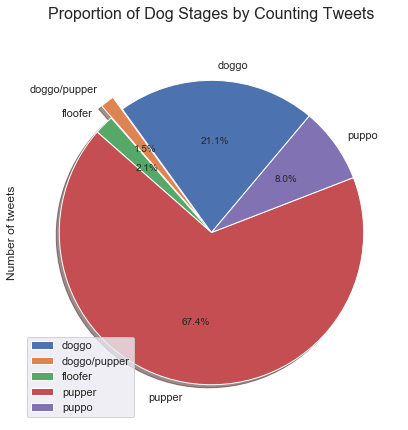

In [107]:
# Create pie plot
df_new_stages.groupby(['Dog Stages']).sum().plot(kind='pie', y='Number of tweets', explode = (0, 0.1, 0, 0, 0), shadow = True, startangle=50,
figsize=(7,7), autopct='%1.1f%%')

#set pie title
plt.title("Proportion of Dog Stages by Counting Tweets\n", fontsize = 16)
plt.show()

> As you can see in this pie bar visualization on the left the 67.4 % of tweets containing a "pupper” stage. The "Doggo" stage was the next most frequent stage at 21.1%. "Floofer" , "puppo" and combined dog stage “doggo/pupper”  all of them leading to a combined 11.6% of the total stages. So, when the stages are provided, the most popular dog stage is “pupper”.

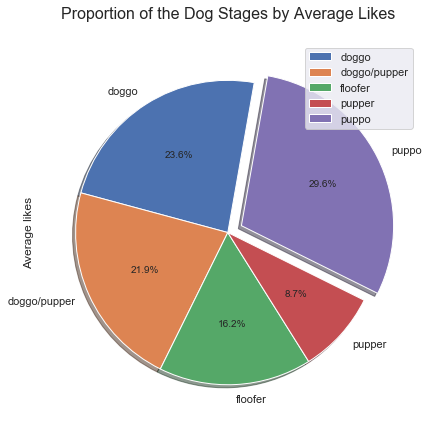

In [108]:
# Create pie plot
df_new_stages.groupby(['Dog Stages']).sum().plot(kind='pie', y='Average likes', shadow = True, startangle=80,
figsize=(12,7), autopct='%1.1f%%', explode = (0, 0, 0, 0, 0.1))

#set pie title
plt.title("Proportion of the Dog Stages by Average Likes\n", fontsize = 16)
plt.show()

> As you can see in this pie bar visualization on the left,  the most likeable dog stage is “puppo” with 29.6 % of average likes per tweet. The "Doggo" stage was the next most likeable stage with 23.6% and “Doggo/pupper” combined stages followed with 21.9%. "Floofer" and "puppo" together have a total 24.9% proportion. 

<a id='sourceretweets'></a>
###  **1.2 Which are the most popular tweet sources by retweets?**

In [109]:
# Receiving tweet count of all sources
df_merged_clean['source'].value_counts()

Twitter for iPhone     1948
Twitter Web Client       28
TweetDeck                10
Vine - Make a Scene       0
Name: source, dtype: int64

In [110]:
#Creating new dataset for sources with number of tweets, total retweet received and Average retweet
tweet_sources = df_merged_clean.groupby('source').retweet_count.agg(['count', 'sum'])
tweet_sources['average'] = tweet_sources['sum'] / tweet_sources['count']
df_tweet_sources = tweet_sources.sort_values(by=['sum'], ascending=False).head(10)

#convert dictionary to a dataframe
df_tweet_sources = pd.DataFrame(df_tweet_sources)
df_tweet_sources.index.name = 'Tweet Source'
df_tweet_sources.reset_index(inplace=True)
df_tweet_sources.rename(columns={'count': 'Number of tweets', 'sum': 'Total retweet received', 'average': 'Average retweet by tweet'}, inplace=True)
df_tweet_sources.head(3)

,Tweet Source,Number of tweets,Total retweet received,Average retweet by tweet
0,Twitter for iPhone,1948,4672856.0,2398.796715
1,Twitter Web Client,28,62315.0,2225.535714
2,TweetDeck,10,17719.0,1771.900000


> The created table shows that Twitter for iPhone source is the most popular tweet source with the 1948 number of tweets and has the highest average retweet count with 2399.93.  The "Twitter Web Client" source has 28 numbers of tweets and the “TweetDeck” source has 10 number of tweets. 

<a id='predicted'></a>
###  **1.3 Which are most predicted dog breed of the tweets?**

In [111]:
# Create predictions 1 table with counts and average sums
top_breed_p1 = df_merged_clean.groupby('1st_prediction').favorite_count.agg(['count', 'sum'])
top_breed_p1 = pd.DataFrame(top_breed_p1)
top_breed_p1 = top_breed_p1.sort_values(by=['count'], ascending=False)
top_breed_p1.index.name = 'Prediction'
top_breed_p1.head()

,count,sum
Prediction,,
,300,2291727
golden retriever,139,1547609
Labrador retriever,93,972574
Pembroke,88,911138
Chihuahua,79,630298


In [112]:
# Create predictions 2 table with counts and average sums
top_breed_p2 = df_merged_clean.groupby('2nd_prediction').favorite_count.agg(['count', 'sum'])
top_breed_p2 = pd.DataFrame(top_breed_p1)
top_breed_p2 = top_breed_p1.sort_values(by=['count'], ascending=False)
top_breed_p2.index.name = 'Prediction'
top_breed_p2

,count,sum
Prediction,,
,300,2291727
golden retriever,139,1547609
Labrador retriever,93,972574
Pembroke,88,911138
Chihuahua,79,630298
pug,54,285803
chow,41,371716
Samoyed,39,470190
Pomeranian,38,278355


In [113]:
# Create predictions 3 table with counts and average sums
top_breed_p3 = df_merged_clean.groupby('3rd_prediction').favorite_count.agg(['count', 'sum'])
top_breed_p3 = pd.DataFrame(top_breed_p1)
top_breed_p3 = top_breed_p1.sort_values(by=['count'], ascending=False)
top_breed_p3.index.name = 'Prediction'
top_breed_p3.reset_index(inplace=True)
top_breed_p3

,Prediction,count,sum
0,,300,2291727
1,golden retriever,139,1547609
2,Labrador retriever,93,972574
3,Pembroke,88,911138
4,Chihuahua,79,630298
5,pug,54,285803
6,chow,41,371716
7,Samoyed,39,470190
8,Pomeranian,38,278355
9,toy poodle,37,213141


In [114]:
# merge top_breed_p1 with top_breed_p2
df_merged_p = pd.merge(top_breed_p1, top_breed_p2, how = 'inner', on = ['Prediction']).copy()

# merge df_merged_p with top_breed_p3
df_merged_pp = pd.merge(df_merged_p, top_breed_p3, how = 'inner', on = ['Prediction']).copy()

# drop repeated the columns
df_merged_pp.drop(['count_x', 'sum_x', 'count_y', 'sum_y'], axis=1, inplace = True)
df_merged_pp.head()

,Prediction,count,sum
0,,300,2291727
1,golden retriever,139,1547609
2,Labrador retriever,93,972574
3,Pembroke,88,911138
4,Chihuahua,79,630298


In [115]:
# Create new prediction dataframe except empty cells and add total likes received, average likes per tweet columns
df_merged_pp = df_merged_pp.loc[df_merged_pp['Prediction'] != '']
df_merged_pp['Average likes per tweet'] = df_merged_pp['sum'] / df_merged_pp['count']
df_merged_pp.rename(columns={'count': 'Number of tweets', 'sum': 'Total likes received'}, inplace=True)
df_merged_pp = df_merged_pp.sort_values(by=['Number of tweets'], ascending=False).head(10)
df_merged_m = pd.DataFrame(df_merged_pp)

In [116]:
# Review new dataframe
df_merged_m.head(10)

,Prediction,Number of tweets,Total likes received,Average likes per tweet
1,golden retriever,139,1547609,11133.877698
2,Labrador retriever,93,972574,10457.784946
3,Pembroke,88,911138,10353.840909
4,Chihuahua,79,630298,7978.455696
5,pug,54,285803,5292.648148
6,chow,41,371716,9066.243902
7,Samoyed,39,470190,12056.153846
8,Pomeranian,38,278355,7325.131579
9,toy poodle,37,213141,5760.567568
10,malamute,29,228061,7864.172414


> After combining three image predictions in one column the count value, the total likes count and the average likes per tweet value was calculated.

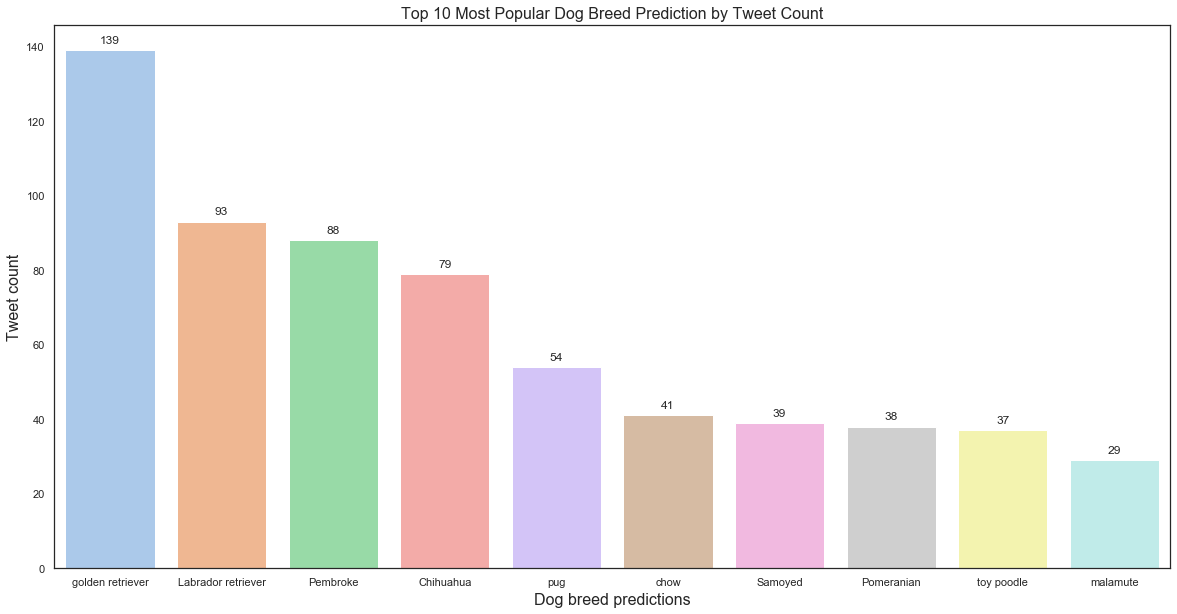

In [117]:
# Set the size
plt.figure(figsize=[20,10])
sns.set(style="white", rc={"lines.linewidth": 3})

# Use bar plot to display Dog breeds by tweet count of occurance
bar_plot_count = sns.barplot(data=df_merged_m.sort_values(by='Number of tweets', ascending=False), x='Prediction', y='Number of tweets', palette='pastel')
for p in bar_plot_count.patches:
    bar_plot_count.annotate(format(p.get_height(),',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#set title and axis labels
plt.xlabel('Dog breed predictions', fontsize = 16)
plt.ylabel('Tweet count', fontsize = 16)
plt.title('Top 10 Most Popular Dog Breed Prediction by Tweet Count', fontsize = 16)
plt.show()

> From the bar plot we can see that Golden retriever dog breed prediction is most popular in the dataset and has appeared 139 times. Second place taken by Labrador retriever appeared 93 times. After two retrievers breeds follow Pembroke (88), Chihuahua (79),  Pug (54) and others.

<a id='likeable'></a>
###  **1.4 Which are the most likeable predicted dog breeds ?**

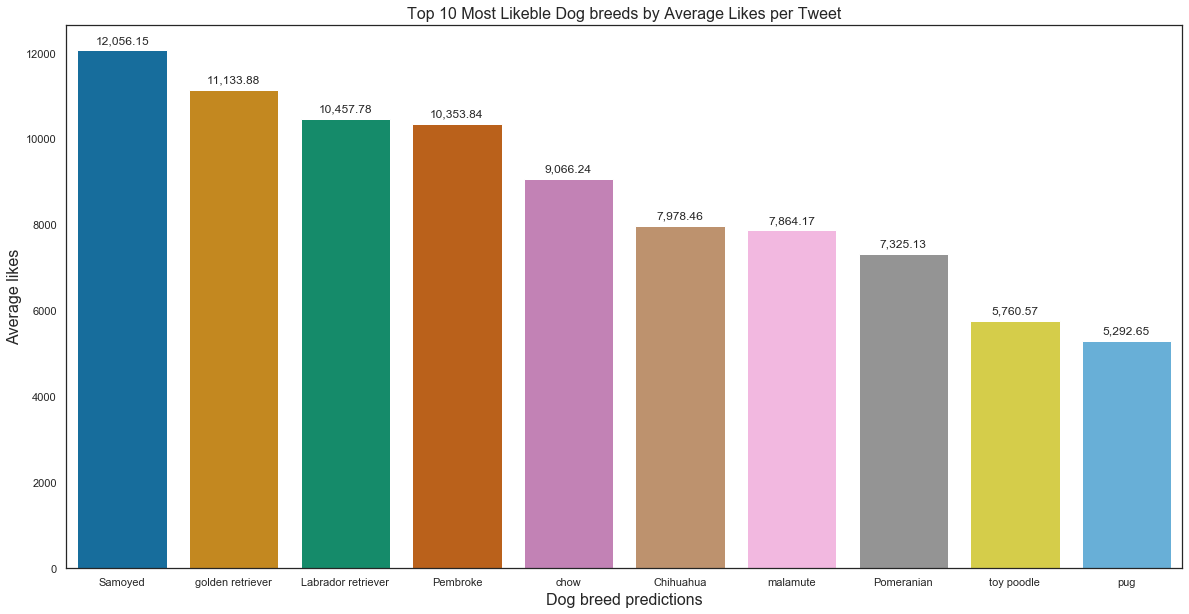

In [118]:
# Set the size
plt.figure(figsize=[20,10])
sns.set(style="white", rc={"lines.linewidth": 3})

# Use bar plot to display Dog breeds by average likes per tweet
bar_plot_likes = sns.barplot(data=df_merged_m.sort_values(by='Average likes per tweet', ascending=False), x='Prediction', y='Average likes per tweet', palette='colorblind')
for r in bar_plot_likes.patches:
    bar_plot_likes.annotate(format(r.get_height(),',.2f'), (r.get_x() + r.get_width() / 2., r.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#set title and axis labels
plt.xlabel('Dog breed predictions', fontsize = 16)
plt.ylabel('Average likes', fontsize = 16)
plt.title('Top 10 Most Likeble Dog breeds by Average Likes per Tweet', fontsize = 16)
plt.show()

> The bar plot above shows that the Samoyed dogs images received more likes (12,058.64 avg. likes) than the rest of the dog breeds based on average likes by count of tweets. Second and third places taken by Golden and Labrador retriever with 11,136 and 10,460 average likes.  After them follow Pembroke, Chow, Chihuahua, Malamute  and others.


### Sources

- Python for Data Analysis - Wes McKinney - 2012;
- Jupyter Notebooks https://jupyter.org/
- Pandas Documentation https://pandas.pydata.org/
- Kaggle guide https://www.kaggle.com/learn/pandas 
- And below links:
    - Pandas DataFrame Plot - Pie Chart:https://kontext.tech/column/code-snippets/402/pandas-dataframe-plot-pie-chart
    - How to add percentages on top of bars in seaborn?: https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
    - General principles for using color in plots: https://seaborn.pydata.org/tutorial/color_palettes.html